In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap



In [15]:
# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "data/binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values
df.head()

,id_L19,z,level_0,level_1,level_2,level_3,level_4,level_5,bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6
0,1.0,0.999855,0.972084,0.947799,0.614903,0.955118,1.233075,2.105449,0.0,30.0,84.0,236.0,660.0,1850.0,5185.0
1,2.0,0.999877,0.731829,0.752371,0.696417,0.751243,1.078478,0.461603,0.0,30.0,83.0,230.0,637.0,1766.0,4890.0
2,3.0,0.999962,0.185444,0.304448,0.257010,0.187302,0.359714,0.173263,0.0,30.0,82.0,224.0,612.0,1672.0,4569.0
3,4.0,0.999992,0.990093,0.869858,0.864553,1.118764,1.872074,1.487741,0.0,30.0,84.0,233.0,648.0,1806.0,5029.0
4,5.0,0.999904,0.088227,0.144837,0.085377,0.146562,0.200182,0.251729,0.0,30.0,83.0,231.0,643.0,1785.0,4958.0


In [16]:
seed = 0

X_train = SFH_lev

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Reshape the data to 2D
n_samples, sz, d = X_train.shape
X_train_2d = X_train.reshape((n_samples, sz * d))


Euclidean k-means


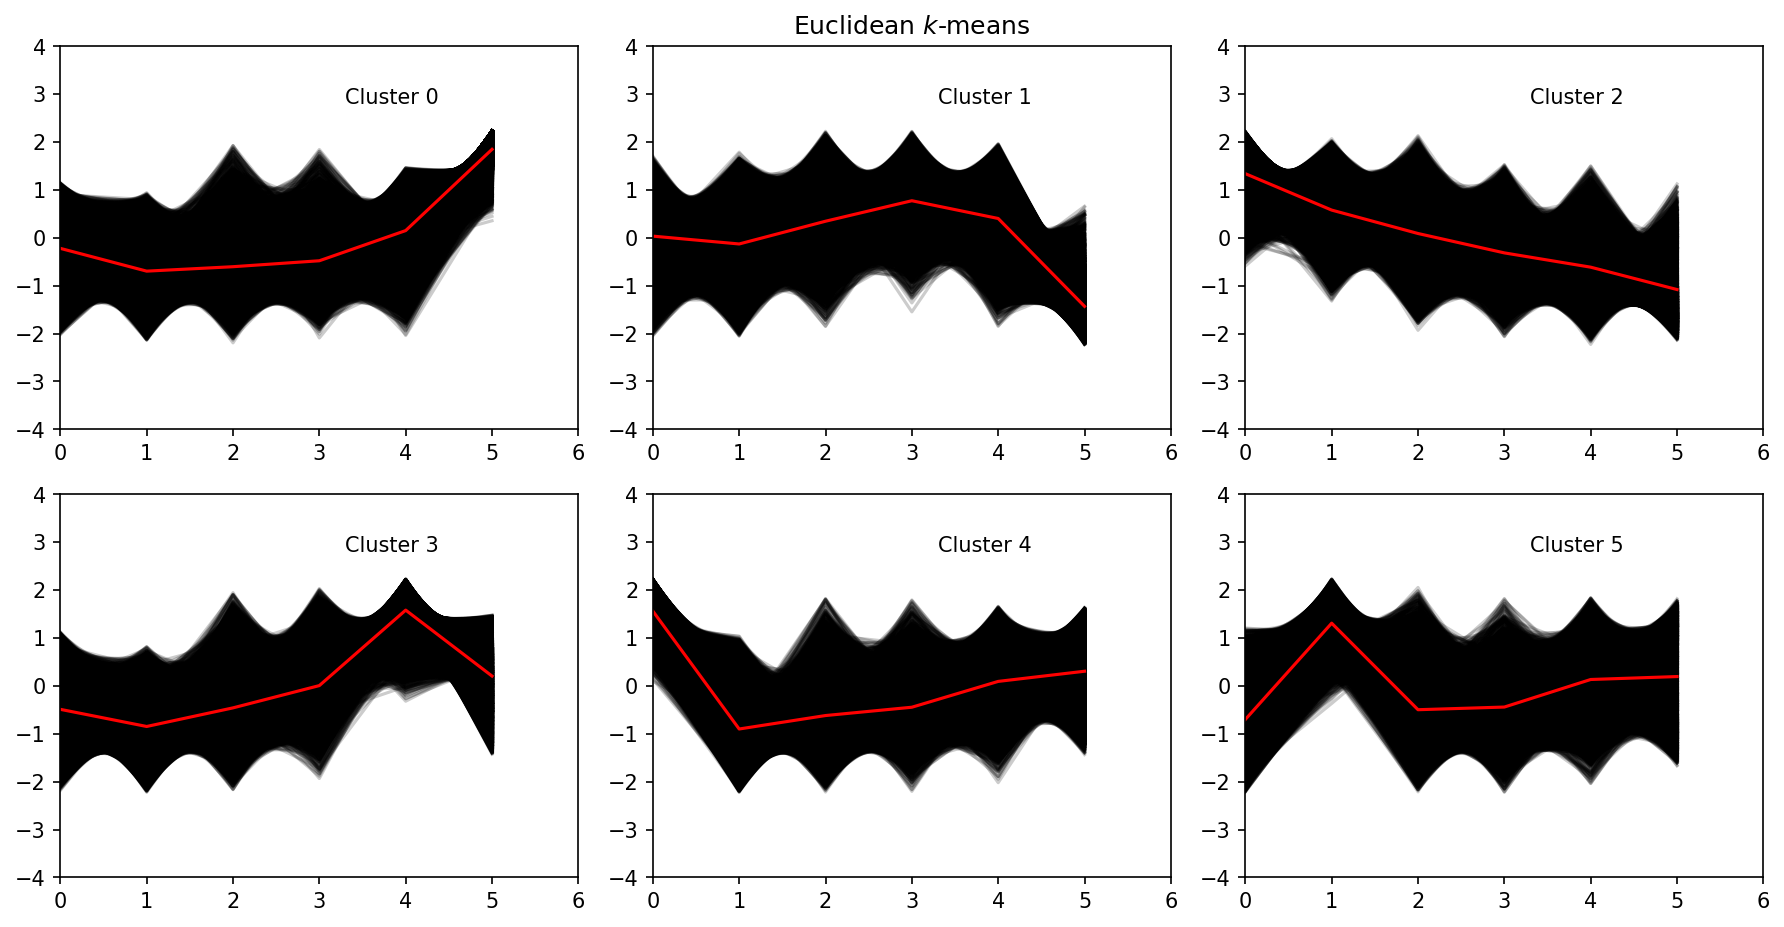

In [21]:
# Euclidean k-means
print("Euclidean k-means")
km = KMeans(n_clusters=6, random_state=seed, n_init="auto")
y_pred = km.fit_predict(X_train_2d)

# Reshape cluster centers back to 3D
cluster_centers_3d = km.cluster_centers_.reshape((6, sz, d))

plt.figure(figsize=(12, 18), dpi=150)  # Increase the figure size and dpi

for yi in range(6):
    plt.subplot(6, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi), transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()



In [ ]:


# project to 3D for plotting
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train_2d)

unique_labels = np.unique(y_pred)
num_labels = len(unique_labels)
colors = cm.rainbow(np.linspace(0, 1, num_labels))
cmap = ListedColormap(colors)

# Increase the resolution
fig = plt.figure(figsize=(10, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# plot data
scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_pred, cmap=cmap, s=0.2)

# Set plot title
ax.set_title('Euclidean k-means 6 CR, PCA projection')

# Add colorbar
cbar = fig.colorbar(scatter)

# Display the plot
plt.show()
